In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
original_df1 = pd.read_csv('../input/wind_dataset_imputed_and_scaled1.csv')
df1 = original_df1.drop('DATE', axis='columns')
df1.head()

original_df2 = pd.read_csv('../input/wind_dataset_imputed_and_scaled2.csv')
df2 = original_df2.drop('DATE', axis='columns')
df2.head()

,WIND,RAIN,T.MAX,T.MIN,T.MIN.G,IND_0,IND_1,IND_4,IND.1_0.0,IND.1_1.0,IND.1_2.0,IND.1_4.0,IND.2_0.0,IND.2_1.0,IND.2_2.0,IND.2_3.0,IND.2_4.0
0,0.450115,0.002985,0.356877,0.515254,0.443709,1,0,0,1,0,0,0,1,0,0,0,0
1,0.378663,0.076119,0.271375,0.532203,0.513245,1,0,0,1,0,0,0,1,0,0,0,0
2,0.370431,0.005970,0.208178,0.406780,0.460265,1,0,0,1,0,0,0,1,0,0,0,0
3,0.284162,0.002985,0.211896,0.403390,0.370861,1,0,0,1,0,0,0,1,0,0,0,0
4,0.392493,0.155224,0.271375,0.338983,0.228477,1,0,0,1,0,0,0,0,1,0,0,0


In [3]:
train_df1, test_df1 = train_test_split(df1, test_size=0.3, shuffle=False)

train_df2, test_df2 = train_test_split(df2, test_size=0.3, shuffle=False)

In [4]:
X1_train = train_df1.drop('WIND', axis='columns')
y1_train = train_df1['WIND']
X1_test = test_df1.drop('WIND', axis='columns')
y1_test = test_df1['WIND']

X2_train = train_df2.drop('WIND', axis='columns')
y2_train = train_df2['WIND']
X2_test = test_df2.drop('WIND', axis='columns')
y2_test = test_df2['WIND']

In [5]:
model = XGBRegressor()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores1 = cross_val_score(model, df1.drop('WIND', axis="columns"), df1['WIND'], scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print(scores1)
scores1 = absolute(scores1)
print('Mean MAE: %.3f (%.3f)' % (scores1.mean(), scores1.std()) )

scores2 = cross_val_score(model, df2.drop('WIND', axis="columns"), df2['WIND'], scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print(scores2)
scores2 = absolute(scores2)
print('Mean MAE: %.3f (%.3f)' % (scores2.mean(), scores2.std()) )

[-0.1184858  -0.11414699 -0.12069781 -0.12246341 -0.12533151 -0.12058499
 -0.11457872 -0.12286496 -0.12230568 -0.11467342 -0.12295033 -0.12168507
 -0.11607019 -0.12138815 -0.11944455 -0.1173896  -0.12019178 -0.12343994
 -0.11683685 -0.11981823 -0.12359836 -0.11983455 -0.11508905 -0.11270845
 -0.11908022 -0.12337115 -0.12755978 -0.11843545 -0.11803749 -0.11838807]
Mean MAE: 0.120 (0.003)
[-0.11865246 -0.1191324  -0.1226495  -0.12822277 -0.12704574 -0.12557398
 -0.11535101 -0.12185299 -0.12184902 -0.11462318 -0.12333558 -0.12428145
 -0.11917545 -0.1231691  -0.1225016  -0.12060217 -0.11686985 -0.12575206
 -0.12255558 -0.1225962  -0.12663775 -0.12066843 -0.11628375 -0.11072076
 -0.12182505 -0.1249706  -0.13029533 -0.12291822 -0.11813446 -0.11747576]
Mean MAE: 0.122 (0.004)


0.12


<AxesSubplot:xlabel='DATE'>

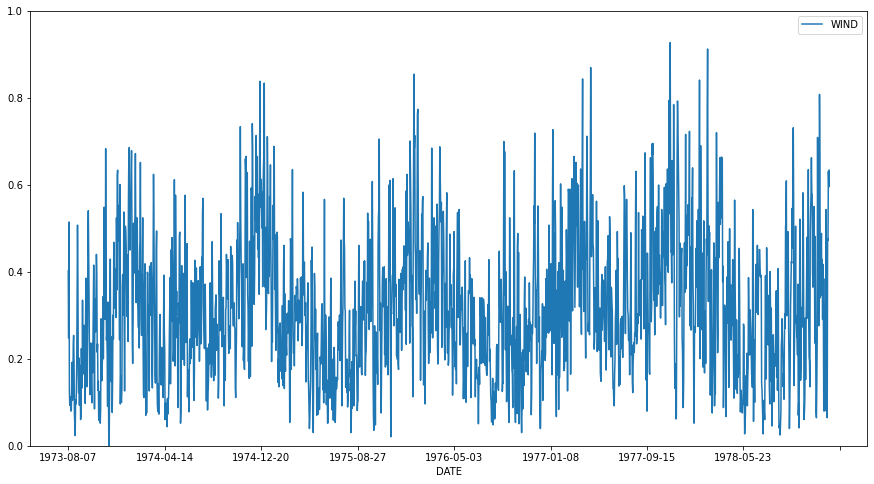

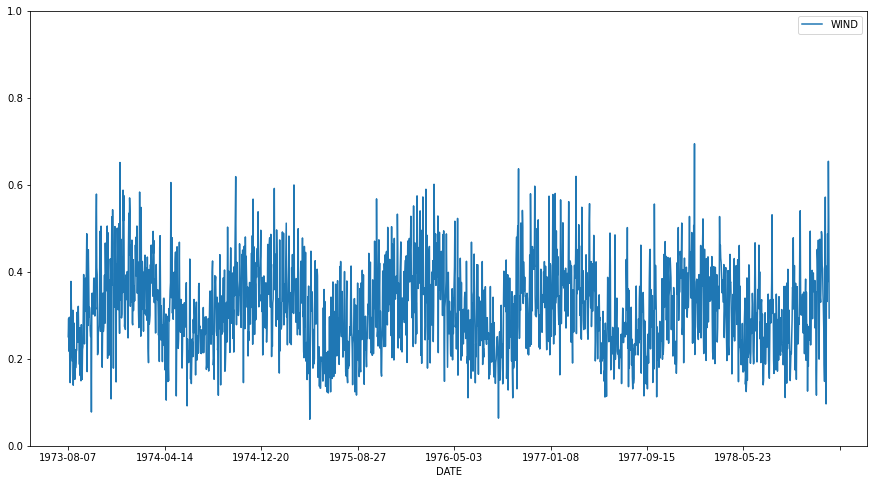

In [6]:
model.fit(X1_train, y1_train)

predicted_y1 = model.predict(X1_test)

print(round(mean_absolute_error(y1_test, predicted_y1), 2))

test_df1['DATE'] = original_df1['DATE']
test_df1 = test_df1.set_index('DATE')
test_df1.plot(y='WIND',figsize=(15,8), ylim=(0, 1))

predicted_y1_df1 = pd.DataFrame([list(x) for x in zip(test_df1.index.array, predicted_y1)], columns=['DATE', 'WIND'])
predicted_y1_df1 = predicted_y1_df1.set_index('DATE')
predicted_y1_df1.plot(y='WIND',figsize=(15,8), ylim=(0, 1))

0.12


<AxesSubplot:xlabel='DATE'>

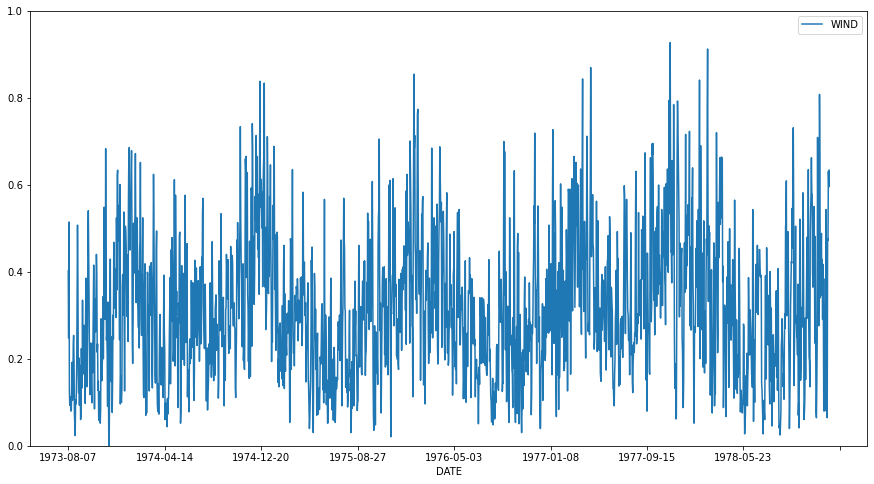

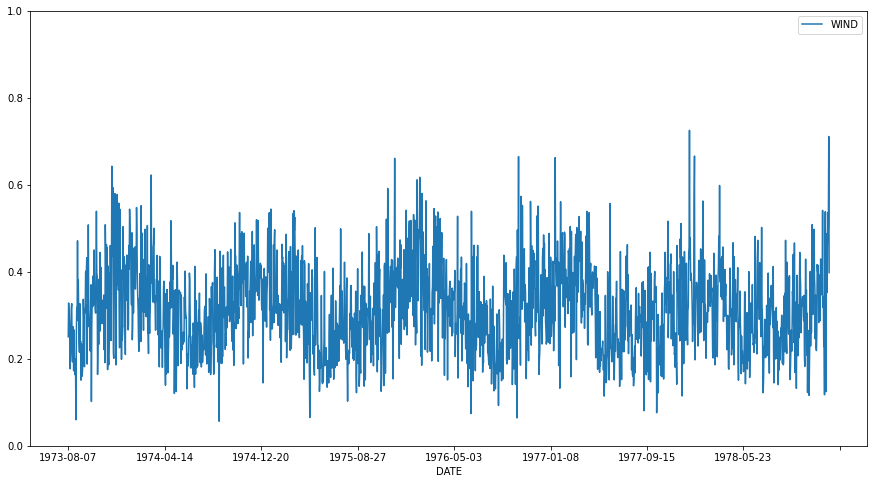

In [7]:
model.fit(X2_train, y2_train)

predicted_y2 = model.predict(X2_test)

print(round(mean_absolute_error(y2_test, predicted_y2), 2))

test_df2['DATE'] = original_df2['DATE']
test_df2 = test_df2.set_index('DATE')
test_df2.plot(y='WIND',figsize=(15,8), ylim=(0,1))

predicted_y2_df2 = pd.DataFrame([list(x) for x in zip(test_df2.index.array, predicted_y2)], columns=['DATE', 'WIND'])
predicted_y2_df2 = predicted_y2_df2.set_index('DATE')
predicted_y2_df2.plot(y='WIND',figsize=(15,8), ylim=(0,1))